# Лабораторная работа № 4

## Морозова Маргарита, РИ-481223

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.stats as stats
from scipy.optimize import curve_fit
from statsmodels.tsa import api as tsa
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression
%matplotlib inline

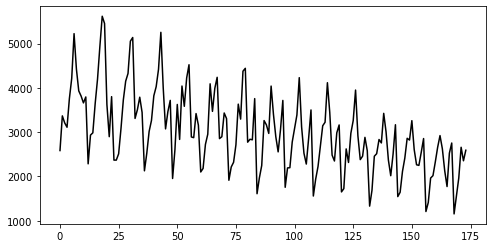

In [31]:
file =h5py.File(r'C:\Users\Морозова Маргарита\Downloads\Fort.mat') 
data = file.get('Fort') 
Fort = np.array(data)
plt.figure(figsize = (8, 4))
plt.plot(Fort, 'k')
plt.show()

Отрежем от данного ряда последние 24точки (которые мы и будем прогнозировать):

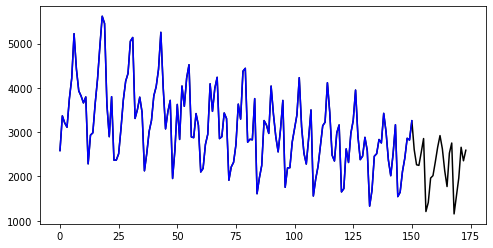

In [9]:
Z= Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (8, 4))
plt.plot(Fort, 'k') # исходныйВР
plt.plot(t, Z, 'b') # урезанныйряд
plt.show()

### Тренд первого порядка

[3849.23884629   -9.58949808]


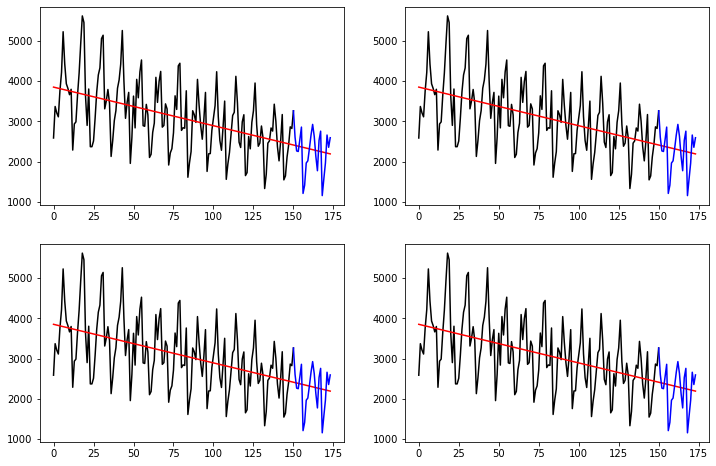

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
t=np.arange(0, len(Z), 1)# диапазон урезанного ряда
t=t.reshape(-1,1)
t0=np.arange(0, len(Fort), 1)# диапазонполногоряда
t0=t0.reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t, Z)#модельрегрессии
plt.plot(t, Z, 'k')
plt.plot(t0, reg.predict(t0), 'r')# прогнознавесьдиапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения

plt.subplot(222)
import statsmodels.api as sm
x_ = sm.add_constant(t)
smm = sm.OLS(Z, x_) 
res= smm.fit() #строим модель регрессии
print(res.params) 
plt.plot(t, Z, 'k')
plt.plot(t0, res.predict(sm.add_constant(t0)), 'r')# строимпрогноз
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения

plt.subplot(223)
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1) 
p = np.poly1d(bb) # создаем экземпляр полинома
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.subplot(224)
def func(t, b0, b1):return b0 + b1 * t
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.plot(t, Z, 'k')
plt.plot(t0, t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')


### Прогнозы трендов для кривой второго порядка

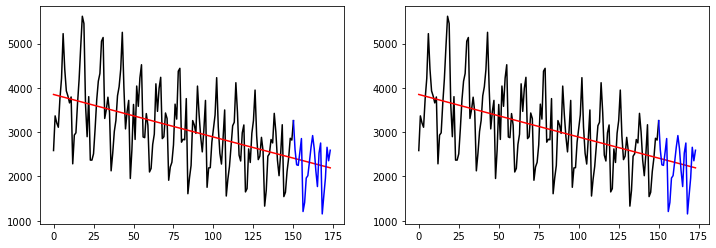

In [14]:
t=np.arange(0, len(Z), 1) # урезанный ряд 
t0=np.arange(0, len(Fort), 1) # полный ряд

plt.figure(figsize=(12, 4))

plt.subplot(121)
def func_2(t, b0, b1, b2): # описываем функцию тренда 
    return b0 + b1 * t + b2 * t * t # линейный тренд с 3 параметрами 
popt_2, pcov_2 = curve_fit(func_2, t, Z.reshape(len(Z)))  # проводим подгонку МНК                          
plt.plot(t, Z, 'k') 
plt.plot(t0, func_2(t0, popt_2[0], popt_2[1], popt_2[2]), 'r')# прогноз на весь диапазон 
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения 

plt.subplot(122)
bb2 = np.polyfit(t, Z.reshape(len(Z)), 2) # полиномиальная кривая 2-го порядка  
plt.plot(t, Z, 'k') 
plt.plot(t0, bb2[2] + bb2[1]*t0 + bb2[0]*t0*t0, 'r') # прогноз на весь диапазон 
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения 

### Прогнозы трендов для кривой третьего порядка

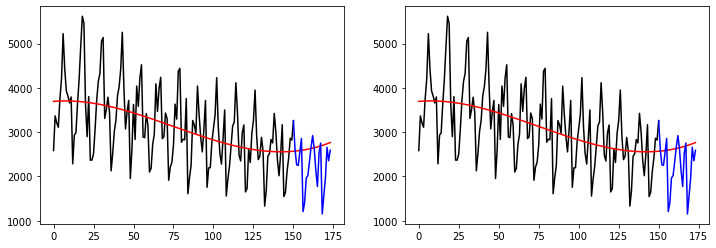

In [15]:
t=np.arange(0, len(Z), 1) # урезанный ряд 
t0=np.arange(0, len(Fort), 1) # полный ряд

plt.figure(figsize=(12, 4))

plt.subplot(121)
def func_3(t, b0, b1, b2, b3): # описываем функцию тренда 
    return b0 + b1 * t + b2 * t * t + b3 * t * t * t # линейный тренд с 4 параметрами 
popt_3, pcov_3 = curve_fit(func_3, t, Z.reshape(len(Z)))  # проводим подгонку МНК                            
plt.plot(t, Z, 'k') 
plt.plot(t0, func_3(t0, popt_3[0], popt_3[1], popt_3[2], popt_3[3]), 'r')# прогноз на весь диапазон 
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения 

plt.subplot(122)
bb3 = np.polyfit(t, Z.reshape(len(Z)), 3) # полиномиальная кривая 3-го порядка  
plt.plot(t, Z, 'k') 
plt.plot(t0, bb3[3] + bb3[2]*t0 + bb3[1]*t0*t0 + bb3[0]*t0*t0*t0, 'r') # прогноз на весь диапазон 
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения 

### Средние ошибки прогноза

In [17]:
t0=t0.reshape(-1,1) 
reg.predict(t0)
print('Тренд первого порядка: ', np.sum(np.abs(reg.predict(t0[-24:])-Fort[-24:]))/24)
print('Тренд первого порядка: ', np.sum(np.abs((t0[-24:]*popt[1]+popt[0])-Fort[-24:]))/24)
print('Тренд второго порядка: ', np.sum(np.abs(Fort[-24:]-(func_2(t0[-24:], popt_2[0], popt_2[1], popt_2[2]))))/24)
print('Тренд второго порядка: ', np.sum(np.abs(Fort[-24:]-(bb2[2] + bb2[1]*t0[-24:] + bb2[0]*t0[-24:]*t0[-24:])))/24)
print('Тренд третьего порядка:', np.sum(np.abs(Fort[-24:]-(bb3[3] + bb3[2]*t0[-24:] + bb3[1]*t0[-24:]*t0[-24:] + bb3[0]*t0[-24:]*t0[-24:]*t0[-24:])))/24)

Тренд первого порядка:  437.01727779714184
Тренд первого порядка:  437.0172777967639
Тренд второго порядка:  436.69908454591615
Тренд второго порядка:  436.69908454120315
Тренд третьего порядка: 494.1128372648475


### СКВО прогноза:

In [18]:
print ('Тренд первого порядка :', np.sqrt(np.sum((Fort[-24:]-reg.predict(t0[-24:]))**2)/24))
print ('Тренд второго порядка :', np.sqrt(np.sum((Fort[-24:]-(func_2(t0[-24:], popt_2[0], popt_2[1], popt_2[2])))**2)/24))
print ('Тренд третьего порядка :', np.sqrt(np.sum((Fort[-24:]-(func_3(t0[-24:], popt_3[0], popt_3[1], popt_3[2], popt_3[3])))**2)/24))

Тренд первого порядка : 531.284134980843
Тренд второго порядка : 531.51357138277
Тренд третьего порядка : 665.0082858768127


### Средняя ошибка аппроксимации

In [19]:
print ('Тренд первого порядка :',(np.sum(np.abs(Fort[-24:]-reg.predict(t0[-24:]))/Fort[-24:])/24)*100)
print ('Тренд второго порядка :',(np.sum(np.abs(Fort[-24:]-(func_2(t0[-24:], popt_2[0], popt_2[1], popt_2[2])))/Fort[-24:])/24)*100)
print ('Тренд третьего порядка :',(np.sum(np.abs(Fort[-24:]-(func_3(t0[-24:], popt_3[0], popt_3[1], popt_3[2], popt_3[3])))/Fort[-24:])/24)*100)

Тренд первого порядка : 23.514412988159798
Тренд второго порядка : 23.53339382816084
Тренд третьего порядка : 29.305176107289405


### Коэффицмент несоответствия 1

In [20]:
print ('Тренд первого порядка :',np.sqrt(np.sum((reg.predict(t0[-24:])-Fort[-24:])**2)/np.sum((Fort[-24:])**2)))
print ('Тренд второго порядка :',np.sqrt(np.sum(((func_2(t0[-24:], popt_2[0], popt_2[1], popt_2[2]))-Fort[-24:])**2)/np.sum((Fort[-24:])**2)))
print ('Тренд третьего порядка :',np.sqrt(np.sum(((func_3(t0[-24:], popt_3[0], popt_3[1], popt_3[2], popt_3[3]))-Fort[-24:])**2)/np.sum((Fort[-24:])**2)))

Тренд первого порядка : 0.2281001855331433
Тренд второго порядка : 0.2281986911771138
Тренд третьего порядка : 0.28551297394763747


### Коэффицмент несоответствия 2

In [21]:
print ('Тренд первого порядка :',np.sqrt(np.sum((reg.predict(t0[-24:])-Fort[-24:])**2)/np.sum((np.mean(reg.predict(t0[-24:]))-Fort[-24:])**2)))
print ('Тренд второго порядка :',np.sqrt(np.sum(((func_2(t0[-24:], popt_2[0], popt_2[1], popt_2[2]))-Fort[-24:])**2)/np.sum((np.mean(func_2(t0[-24:], popt_2[0], popt_2[1], popt_2[2]))-Fort[-24:])**2)))
print ('Тренд третьего порядка :',np.sqrt(np.sum(((func_3(t0[-24:], popt_3[0], popt_3[1], popt_3[2], popt_3[3]))-Fort[-24:])**2)/np.sum((np.mean(func_3(t0[-24:], popt_3[0], popt_3[1], popt_3[2], popt_3[3]))-Fort[-24:])**2)))

Тренд первого порядка : 0.9886411663018166
Тренд второго порядка : 0.9886768800487401
Тренд третьего порядка : 1.0118601804268248


### Доверительные интервалы

In [24]:
t=t.reshape(-1,1)

trend_1=lambda s: s*popt[1]+popt[0]
trend_2=lambda s: func_2(s, popt_2[0], popt_2[1], popt_2[2])
trend_3=lambda s: func_3(s, popt_3[0], popt_3[1], popt_3[2], popt_3[3])
delta_1=[]
S=np.sqrt(np.sum((Z-trend_1(t))**2)/(len(Z)-2))
for l in range (-1, 23):
    g=1.96*S*np.sqrt(1+(1/len(Z))+(trend_1(t0[len(Z)+l])-np.mean(trend_1(t)))/np.sum((trend_1(t)-np.mean(trend_1(t)))**2))
    delta_1.append(g[0])
delta_2 = 1.96*np.sqrt(np.sum((trend_2(t0[-24:])-Fort[-24:])**2)/24)
delta_3 = 1.96*np.sqrt(np.sum((trend_3(t0[-24:])-Fort[-24:])**2)/24)


In [25]:
def Interval(trend, delta):  
    
    upper_limits=trend(t0[-24:]) + np.array(delta).reshape(-1,1)
    lower_limits=trend(t0[-24:]) - np.array(delta).reshape(-1,1)

    plt.plot(t, Z, 'k') 
    plt.plot(t0, trend(t0), 'r') 
    plt.plot(t0[-24:], Fort[-24:], 'b') 
    plt.plot(t0[-24:], upper_limits, 'g')
    plt.plot(t0[-24:], lower_limits, 'g')

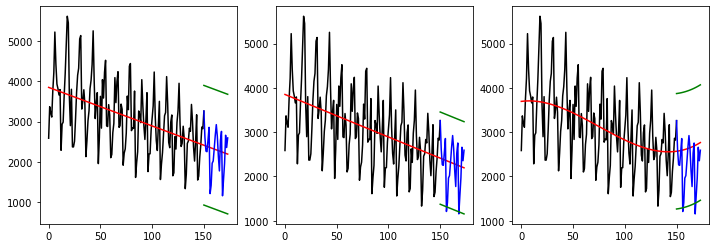

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
Interval (trend_1, delta_1)

plt.subplot(132)
Interval (trend_2, delta_2)

plt.subplot(133)
Interval (trend_3, delta_3)